In [207]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from fit_spectra import cube_fit_element
from display import plot_example_spectra, plot_rgb_image
from constants import EmissionLines

## Fitting on H $\beta$ Emission Lines

### Load and Extract Data

In [208]:
file = 'manga-12510-12701-LOGCUBE.fits'

with fits.open(file) as cube:
    flux = cube['FLUX'].data
    wave = cube['WAVE'].data
    true_z = 0.021240542    # From NSA catalogue

### Image of Galaxy

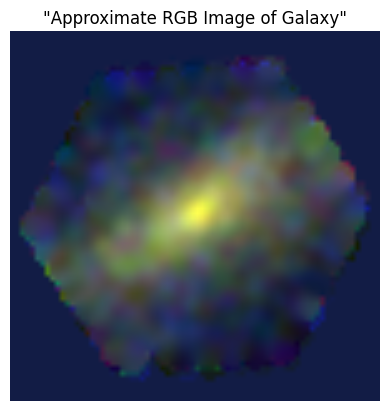

In [209]:
plot_rgb_image(flux, wave, b_scale=0.6)

### Plot Example Spectrum

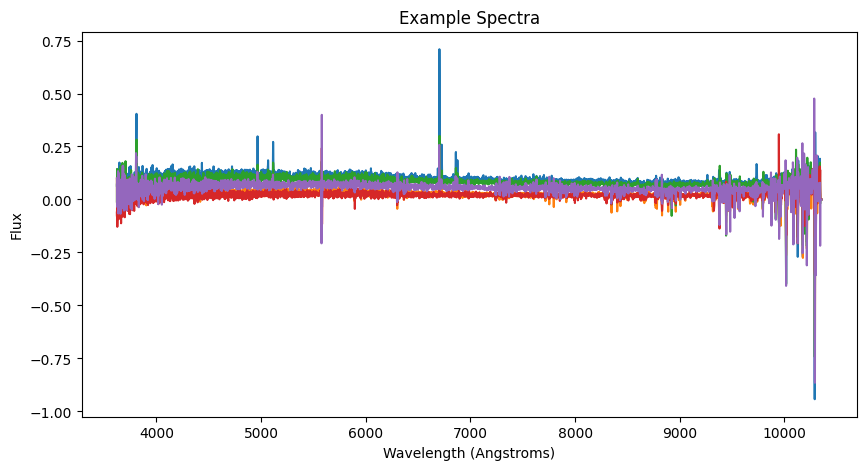

In [210]:
plot_example_spectra(flux, wave, n=5)

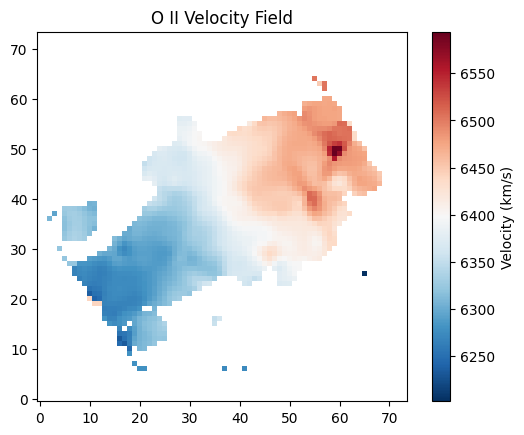

In [ ]:
Hb = EmissionLines.H_BETA[0]

vel_map, flux_map, wave_map, z_map, popt_map = cube_fit_element(flux, wave, lambda_rest=Hb, threshold=0.1, window_centre=4966, ws=10, std=1)

plt.imshow(vel_map, origin='lower', cmap='RdBu_r', vmin=None, vmax=None)
plt.colorbar(label="Velocity (km/s)")
plt.title(r"H$\beta$ Velocity Field")
plt.show()

### Calculate Galaxy Redshift

In [212]:
calculated_z = np.nanmean(z_map)

error = np.abs(calculated_z - true_z) / (true_z)

print(f"Calculated Redshift: {calculated_z:.4f}")
print(f"True Redshift: {true_z:.4f}")
print(f"Relative Error: {error:.2%}")

Calculated Redshift: 0.0215
True Redshift: 0.0212
Relative Error: 1.32%


## Fitting on O I Emission Lines

### Load and Extract Data

In [213]:
file = 'manga-12491-12704-LOGCUBE.fits'

with fits.open(file) as cube:
    flux = cube['FLUX'].data
    wave = cube['WAVE'].data
    true_z = 0.03150029     # From NSA catalogue

### Image of Galaxy

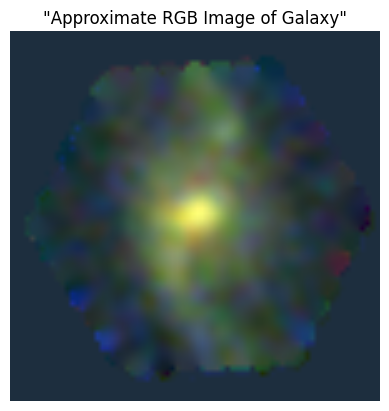

In [214]:
plot_rgb_image(flux, wave, b_scale=0.6)

### Plot Example Spectrum

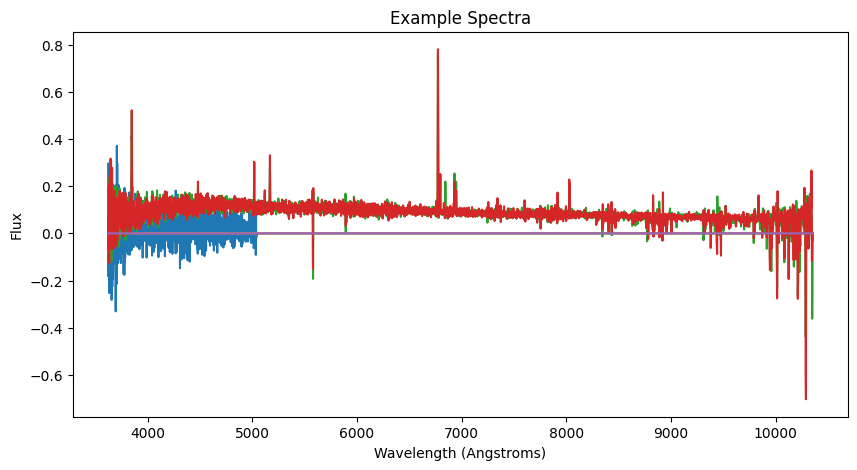

In [215]:
plot_example_spectra(flux, wave, n=5)

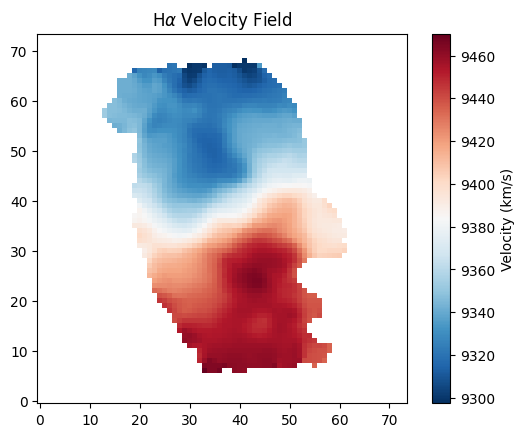

In [216]:
Ha = EmissionLines.H_ALPHA[0]

vel_map, flux_map, wave_map, z_map, popt_map = cube_fit_element(flux, wave, lambda_rest=Ha, window_centre=6772, threshold=0.15, ws=10, std=1)

plt.imshow(vel_map, origin='lower', cmap='RdBu_r', vmin=None, vmax=None)
plt.colorbar(label="Velocity (km/s)")
plt.title(r"H$\alpha$ Velocity Field")
plt.show()

### Calculate Galaxy Redshift

In [217]:
calculated_z = np.nanmean(z_map)

error = np.abs(calculated_z - true_z) / (true_z)

print(f"Calculated Redshift: {calculated_z:.4f}")
print(f"True Redshift: {true_z:.4f}")
print(f"Relative Error: {error:.2%}")

Calculated Redshift: 0.0318
True Redshift: 0.0315
Relative Error: 1.00%
